# Machine Learning Lecture 1

### Written by Young-Ho Song(RISP,IBS)
2020-06-23


## Python/Jupyter/Numpy ...


In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals, unicode_literals

import pathlib
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os 

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


## Perceptron

In [2]:
import numpy as np
import numpy.random 
import matplotlib.pyplot as plt

def step_function(x):
    return (x>0.0)*1.0+(x<0.0)*0.0

class perceptron():
    def __init__(self,input_length,weights=None,bias=None,activation='step'):
        self.input_legnth= input_length 
        if not weights:
            self.weights=numpy.random.rand(input_length)
        else:
            # check length 
            if len(weights)!=input_length:
                print('Error: input length should be the same as weights')
                return 
            self.weights = weights
        if not bias:
            self.bias = numpy.random.rand(1)
        else:
            self.bias = bias
        if activation=='step':
            self.sigma = step_function 
            
    def __call__(self,x):
        return self.sigma(np.dot(self.weights,x)+self.bias)

In [3]:
#-------------------
print('NAND gate')
Nand = perceptron(2,weights=[-2,-2],bias=3.0) 
for i in [0,1]:
    for j in [0,1]:
        print('{},{}->{}'.format(i,j,Nand([i,j])))

print('OR gate')
Or = perceptron(2,weights=[2,2],bias=-1) 
for i in [0,1]:
    for j in [0,1]:
        print('{},{}->{}'.format(i,j,Or([i,j])))
        
print('AND gate')
And = perceptron(2,weights=[0.5,0.5],bias=-0.7) 
for i in [0,1]:
    for j in [0,1]:
        print('{},{}->{}'.format(i,j,And([i,j])))        

NAND gate
0,0->1.0
0,1->1.0
1,0->1.0
1,1->0.0
OR gate
0,0->0.0
0,1->1.0
1,0->1.0
1,1->1.0
AND gate
0,0->0.0
0,1->0.0
1,0->0.0
1,1->1.0


### XOR gate can be made by combining 

In [4]:
print('XOR gate')
XOR = lambda x: And([Nand(x),Or(x)])

for i in [0,1]:
    for j in [0,1]:
        x=[i,j]
        print('{},{}->{}'.format(i,j, XOR(x) ))

XOR gate
0,0->0.0
0,1->1.0
1,0->1.0
1,1->0.0


## Neural Network as a function approximator 

(1) Try with your own inputs..

(2) Try with multi-dimensional case..

### First exampe of NN regression of 1-d function

C:\Users\user\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


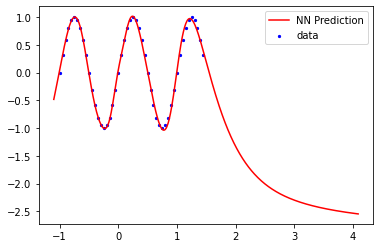

In [5]:
#=====First example: 1d function f(x)=sin(2*pi*x)
from sklearn.neural_network import MLPRegressor
import numpy as np
import matplotlib.pyplot as plt
import random

x = np.arange(-1.0, 1.5, 0.05)
random.shuffle(x)
x= x.reshape(-1, 1)

y = np.sin(2 * np.pi * x).ravel()

nn = MLPRegressor(hidden_layer_sizes=(10,), 
                  activation='logistic', solver='lbfgs')

n = nn.fit(x, y)

test_x = np.arange(-1.1, 4.1, 0.01).reshape(-1, 1)
test_y = nn.predict(test_x)
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(x, y, s=5, c='b', marker="o", label='data')
ax1.plot(test_x,test_y, c='r', label='NN Prediction')

plt.legend()
plt.show()

## Gradient Descent and optimizers

Try:

Notebook2 of   https://physics.bu.edu/~pankajm/MLnotebooks.html 

https://ruder.io/optimizing-gradient-descent/


## Keras (with tensorflow)

Example of classification with MNIST data

The example from the "Deep Learning with Python" 

In [6]:
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [7]:
train_images.shape

(60000, 28, 28)

In [8]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

9


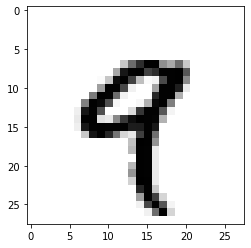

In [9]:
digit = train_images[4]
print(train_labels[4])
import matplotlib.pyplot as plt
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

### Preparing the image data

Convert 

scaling it so that all values are in the [0, 1] interval.

In [10]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

In [11]:
from keras.utils import to_categorical
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

train_labels[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

### Build model

In [12]:
from keras import models
from keras import layers
import tensorflow.keras as keras

network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))

network.compile(optimizer='rmsprop',
               loss='categorical_crossentropy',
               metrics=['accuracy'])

network.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


### Fit/Train model

In [13]:
network.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 3s 6ms/step - loss: 0.2589 - accuracy: 0.9251
Epoch 2/5
469/469 [==============================] - 3s 6ms/step - loss: 0.1022 - accuracy: 0.9692
Epoch 3/5
469/469 [==============================] - 3s 7ms/step - loss: 0.0680 - accuracy: 0.9795
Epoch 4/5
469/469 [==============================] - 3s 6ms/step - loss: 0.0494 - accuracy: 0.9854
Epoch 5/5
469/469 [==============================] - 3s 6ms/step - loss: 0.0375 - accuracy: 0.9886


### Test model

In [14]:
test_loss, test_acc = network.evaluate(test_images, test_labels)

print('test_loss:', test_loss)
print('test_acc:', test_acc)

313/313 [==============================] - 0s 752us/step - loss: 0.0641 - accuracy: 0.9808
test_loss: 0.06411353498697281
test_acc: 0.9807999730110168


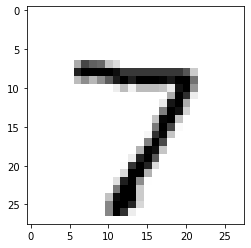

7


In [15]:
plt.imshow(test_images[0].reshape(28,28), cmap=plt.cm.binary)
plt.show()
y_pred=network.predict(np.array([test_images[0]]))
print(np.argmax(y_pred[0]))

## Training nuclear chart 

Download mass16.txt from AME2016 webpage

Use following code to read/prepare data

In [16]:
# convert integer to array 
def integer_to_bin_array(N,dim_b=8):
    """ Convert integers into dim_b bits  binary
    """
    import numpy as np
    bin_str = bin(N)[2:] # to binary string 
    if len(bin_str) > dim_b :
        raise ValueError('{} is too large to be {} bits'.format(N,dim_b))
    bin_str=bin_str.zfill(dim_b) #padding zero 
    bin_array=[float(j) for j in bin_str] 
    return bin_array

def read_mass16(filename='mass16.txt',include_guess=False):
  """
    Read AME mass data file and return a dictionary 
    
    include_guess=False : only make a dictionary with measured data 
                 =True  : dictionary includes guessed data 
  """
  import numpy as np
  import pandas as pd
  def check_number(x):
    # if string is number, return real number 
    # if not, retrun False 
    try:
        y= float(x)
        return (y , 1)
    except :
        return (x, 0) 

  file = open(filename,'r')
  llines = file.readlines()
  file.close() 
  nl_comment=38 # end of commenting lines 
        
  AME16={'NZ':[],'N':[],'Z':[],
       'A':[],'EL':[],'O':[],
       'mass_excess':[],'mass_excess_measured':[],'mass_excess_unc':[],
       'BE/A':[],'BE/A_measured':[],'BE/A_unc':[],
       'B':[],
       'beta':[],'beta_measured':[],'beta_unc':[],
       'atomic_mass':[],'atomic_mass_measured':[],'atomic_mass_unc':[],
       'N_bits':[],'Z_bits':[] 
        }
             
  for ll in llines[nl_comment+1: ]:
    (NZ,dummy)= check_number(ll[1:4])
    (N, dummy)= check_number(ll[4:9])
    (Z, dummy)= check_number(ll[9:14])
    (A,dummy) = check_number(ll[14:19])
    EL = ll[20:23]
    O  = ll[23:27] # ?
    (mass_excess,mass_excess_measured) = check_number(ll[28:41])  # mass_excess
    (mass_excess_unc,dummy)= check_number(ll[41:52])
    (binding,binding_measured) = check_number(ll[52:63])
    (binding_unc,dummy) = check_number(ll[63:72])
    B = ll[73:75] #?
    (beta,beta_measured) = check_number(ll[75:86])
    (beta_unc,dummy) = check_number(ll[86:95])
    (amass,dummy) = check_number(ll[96:99])
    (amass2,amass_measured) = check_number(ll[100:112])
    if amass_measured:
        amass = amass+amass2/10**6 
    else: 
        amass = str(amass)+' '+amass2.strip() 
    (amass_unc,dummy) = check_number(ll[112:122])
    N_bits = integer_to_bin_array(int(N))
    Z_bits = integer_to_bin_array(int(Z))
    if (not include_guess) and (not amass_measured): # only take measured values 
      pass 
    else : 
      AME16['NZ'].append(NZ)
      AME16['N'].append(N)
      AME16['Z'].append(Z)
      AME16['A'].append(A)
      AME16['EL'].append(EL)
      AME16['O'].append(O)
      AME16['mass_excess'].append(mass_excess)
      AME16['mass_excess_measured'].append(mass_excess_measured)
      AME16['mass_excess_unc'].append(mass_excess_unc)
      AME16['BE/A'].append(binding)
      AME16['BE/A_measured'].append(binding_measured)
      AME16['BE/A_unc'].append(binding_unc)
      AME16['B'].append(B)
      AME16['beta'].append(beta)
      AME16['beta_measured'].append(beta_measured)
      AME16['beta_unc'].append(beta_unc)
      AME16['atomic_mass'].append(amass)
      AME16['atomic_mass_measured'].append(amass_measured)
      AME16['atomic_mass_unc'].append(amass_unc)  
      AME16['N_bits'].append(N_bits)  
      AME16['Z_bits'].append(Z_bits)    
  return AME16      

In [17]:
# read data and prepare dataframe 
AME16_dic=read_mass16()
AME16_df=pd.DataFrame.from_dict(AME16_dic) # convert dictionary to pd.DataFrame 

# drop empty data 
AME16_df = AME16_df.dropna()

# atomic mass unit will be used for onversion later 
atomic_mass_unit = 931.4940954 # MeV 

In [18]:
AME16_df.describe()

,NZ,N,Z,A,mass_excess,mass_excess_measured,mass_excess_unc,BE/A,BE/A_measured,BE/A_unc,beta_measured,atomic_mass,atomic_mass_measured,atomic_mass_unc
count,2498.000000,2498.000000,2498.000000,2498.000000,2498.00000,2498.0,2498.000000,2498.000000,2498.0,2498.000000,2498.000000,2498.000000,2498.0,2498.000000
mean,21.774620,76.921938,55.147318,132.069255,-38170.10753,1.0,30.565736,8051.281393,1.0,0.543048,0.879504,132.028278,1.0,32.813274
std,15.333068,39.514909,25.930144,65.057650,42841.05803,0.0,94.224379,728.199957,0.0,2.721440,0.325606,65.073947,0.0,101.154069
min,-6.000000,0.000000,0.000000,1.000000,-91652.85300,1.0,0.000000,0.000000,1.0,0.000000,0.000000,1.007825,1.0,0.000000
25%,10.000000,46.000000,35.000000,82.000000,-71626.16125,1.0,1.787000,7819.362250,1.0,0.015000,1.000000,81.916725,1.0,1.917250
50%,20.000000,78.000000,56.000000,134.000000,-51437.71450,1.0,6.845000,8184.204000,1.0,0.051500,1.000000,133.919663,1.0,7.348000
75%,32.000000,107.000000,78.000000,184.000000,-11567.73100,1.0,19.962250,8450.522500,1.0,0.142750,1.000000,183.959309,1.0,21.429500
max,59.000000,160.000000,110.000000,270.000000,134834.70900,1.0,1336.694000,8794.553000,1.0,58.903000,1.000000,270.144583,1.0,1435.000000


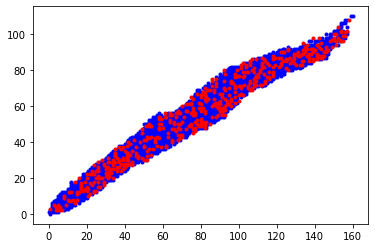

In [19]:
# Let us simplify the data as numpy arrays.
#--training data

#Separation of train set and test set 
dataset = AME16_df ;
train_dataset = dataset.sample(frac=0.8) ;# train+validation data set  
dataset = dataset.drop(train_dataset.index) #remove train data from dataset 
#validation_dataset = dataset.sample(frac=0.5)
#test_dataset= dataset.drop(validation_dataset.index) 
test_dataset = dataset

train_N = train_dataset['N'].to_numpy()
train_Z = train_dataset['Z'].to_numpy()
train_X = np.column_stack((train_N,train_Z)) # train_X[n_sample, 0:1]
train_Y = train_dataset['BE/A'].to_numpy()/1000. # BE/A in MeV

#-- test data 
test_N = test_dataset['N'].to_numpy()
test_Z = test_dataset['Z'].to_numpy()
test_X = np.column_stack((test_N,test_Z)) # train_X[n_sample, 0:1]
test_Y = test_dataset['BE/A'].to_numpy()/1000. # BE/A in MeV

plt.plot(train_X[:,0],train_X[:,1],'b.'
         ,test_X[:,0],test_X[:,1],'r.')

### Now try to make a NN to train nuclear Binding Energy per nucleon. 